In [11]:
pip install torch torchvision einops matplotlib


In [ ]:
2.1

In [12]:
import torch
import torchvision
from torchvision import datasets, transforms
import random

# Download dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# Select 1000 random samples
subset_indices = random.sample(range(len(mnist)), 1000)
mnist_subset = torch.utils.data.Subset(mnist, subset_indices)

# Extract images and labels
images = torch.stack([mnist[i][0] for i in subset_indices])  # Shape: [1000, 1, 28, 28]
labels = torch.tensor([mnist[i][1] for i in subset_indices])


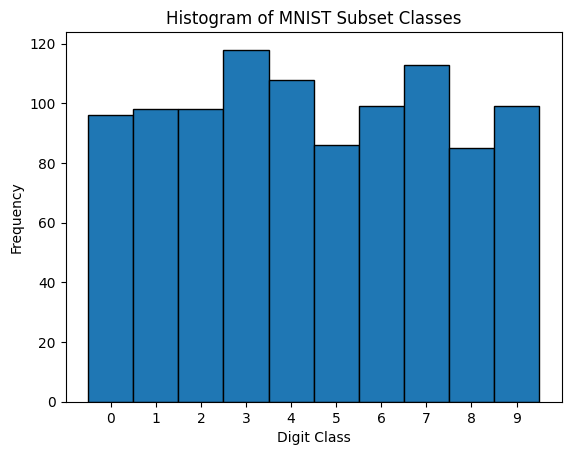

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(labels.numpy(), bins=np.arange(11)-0.5, edgecolor='black')
plt.xticks(range(10))
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Subset Classes")
plt.show()


In [15]:
from einops import rearrange

# Change shape: [1000, 28, 28] → [40, 25, 1, 28, 28]
batched_images = rearrange(images, "(b batch) c h w -> b batch c h w", batch=25)
print(f"Batched shape: {batched_images.shape}")


Batched shape: torch.Size([40, 25, 1, 28, 28])


In [16]:
from einops import rearrange

# Change shape: [1000, 28, 28] → [40, 25, 1, 28, 28]
batched_images = rearrange(images, "(b batch) c h w -> b batch c h w", batch=25)
print(f"Batched shape: {batched_images.shape}")


Batched shape: torch.Size([40, 25, 1, 28, 28])


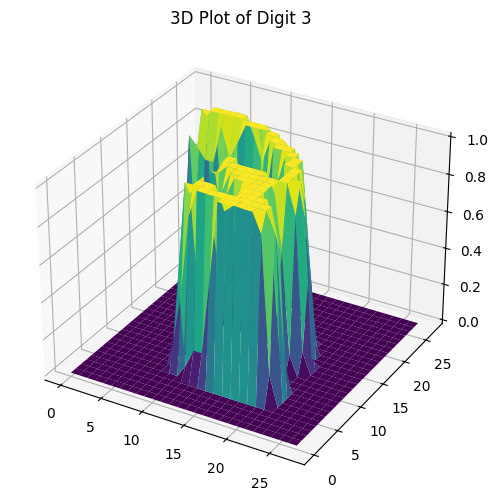

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Select a random image
idx = random.randint(0, 999)
img = images[idx][0].numpy()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(range(28), range(28))
ax.plot_surface(x, y, img, cmap='viridis')

plt.title(f"3D Plot of Digit {labels[idx].item()}")
plt.show()


In [ ]:
2.2

In [18]:
import pandas as pd

url = "https://github.com/LuisM78/Appliances-energy-prediction-data/raw/master/energydata_complete.csv"
energy_df = pd.read_csv(url, parse_dates=["date"], index_col="date")
energy_df.head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


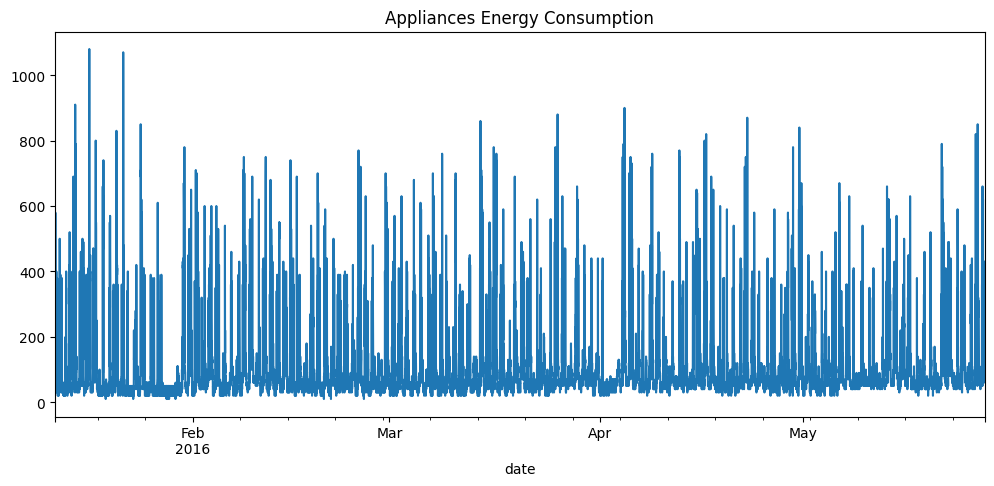

In [19]:
energy_df["Appliances"].plot(figsize=(12,5), title="Appliances Energy Consumption")
plt.show()


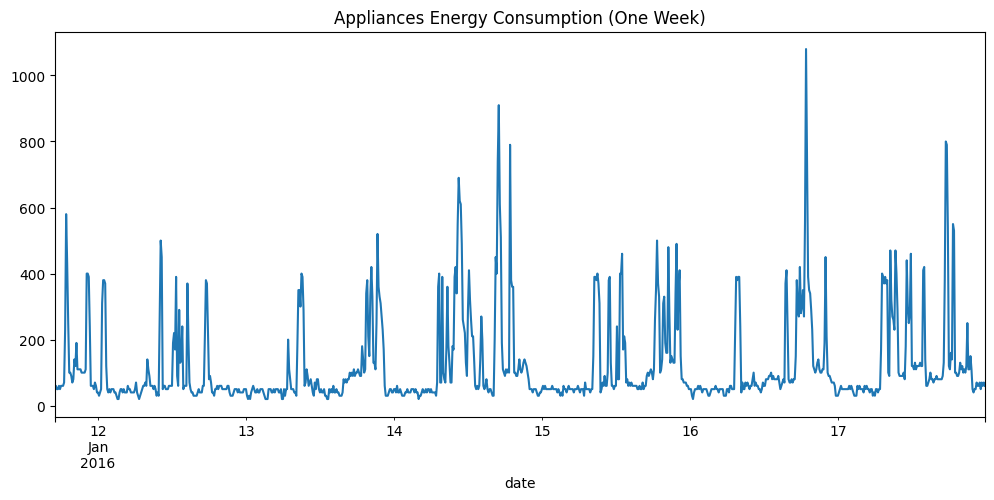

In [20]:
week_data = energy_df.loc["2016-01-11":"2016-01-17", "Appliances"]
week_data.plot(figsize=(12,5), title="Appliances Energy Consumption (One Week)")
plt.show()


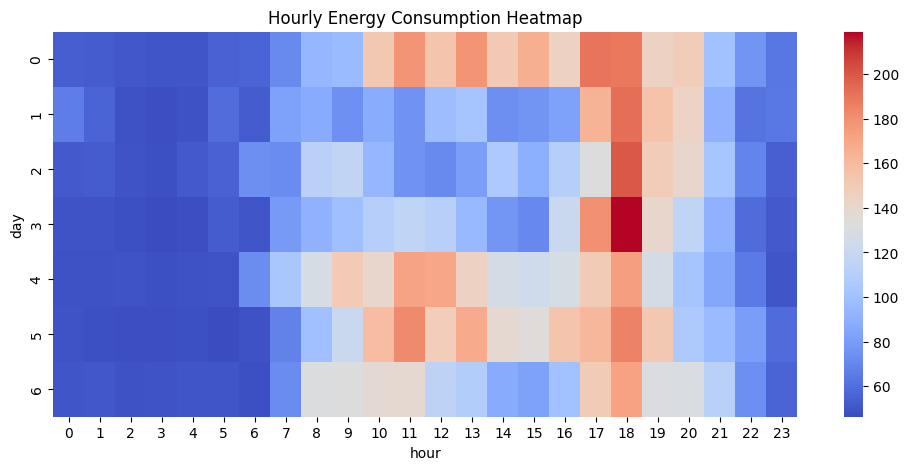

In [21]:
import seaborn as sns

energy_df["hour"] = energy_df.index.hour
energy_df["day"] = energy_df.index.dayofweek
pivot_table = energy_df.pivot_table(values="Appliances", index="day", columns="hour")

plt.figure(figsize=(12,5))
sns.heatmap(pivot_table, cmap="coolwarm")
plt.title("Hourly Energy Consumption Heatmap")
plt.show()


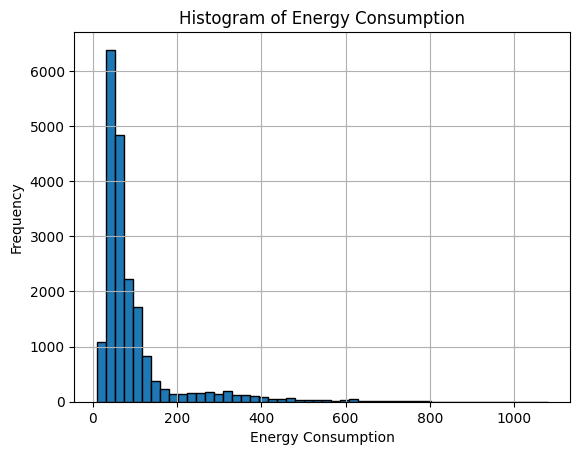

In [22]:
energy_df["Appliances"].hist(bins=50, edgecolor='black')
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Histogram of Energy Consumption")
plt.show()


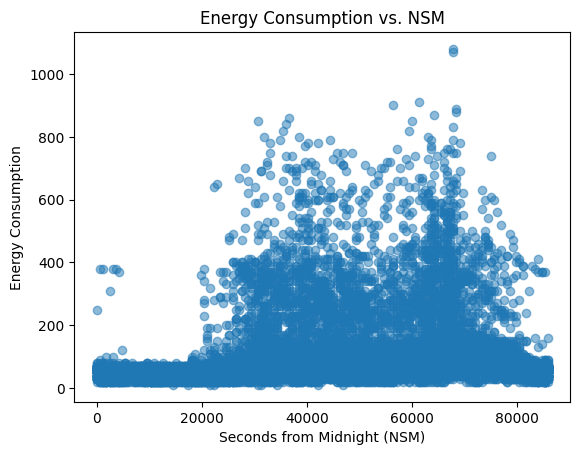

In [23]:
energy_df["NSM"] = energy_df.index.hour * 3600 + energy_df.index.minute * 60

plt.scatter(energy_df["NSM"], energy_df["Appliances"], alpha=0.5)
plt.xlabel("Seconds from Midnight (NSM)")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption vs. NSM")
plt.show()


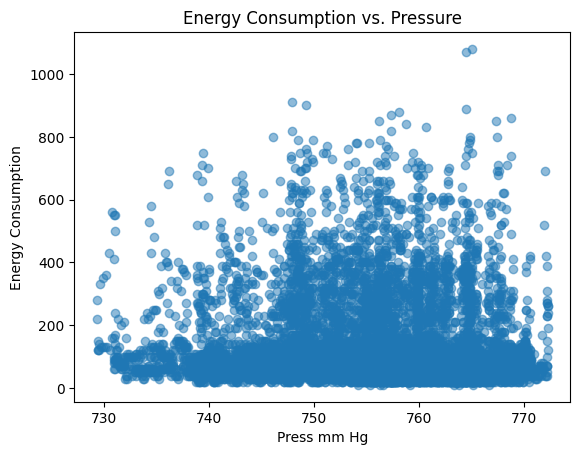

In [24]:
plt.scatter(energy_df["Press_mm_hg"], energy_df["Appliances"], alpha=0.5)
plt.xlabel("Press mm Hg")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption vs. Pressure")
plt.show()


In [ ]:
2.3

In [25]:
airfoil_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
airfoil_df = pd.read_csv(airfoil_url, sep="\t", header=None)
airfoil_df.columns = ["Frequency", "Angle of Attack", "Chord Length", "Free-Stream Velocity", "Suction Side Thickness", "Scaled Sound Pressure Level"]
airfoil_df.head()


,Frequency,Angle of Attack,Chord Length,Free-Stream Velocity,Suction Side Thickness,Scaled Sound Pressure Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [26]:
from scipy.stats import kurtosis, skew

stats = {
    "Mean": airfoil_df.mean(),
    "Variance": airfoil_df.var(),
    "Standard Deviation": airfoil_df.std(),
    "Median": airfoil_df.median(),
    "Kurtosis": airfoil_df.apply(kurtosis),
    "Skewness": airfoil_df.apply(skew),
    "Range": airfoil_df.max() - airfoil_df.min()
}

stats_df = pd.DataFrame(stats)
print(stats_df)


                                    Mean      Variance  Standard Deviation  \
Frequency                    2886.380572  9.938717e+06         3152.573137   
Angle of Attack                 6.782302  3.502424e+01            5.918128   
Chord Length                    0.136548  8.749868e-03            0.093541   
Free-Stream Velocity           50.860745  2.425116e+02           15.572784   
Suction Side Thickness          0.011140  1.729287e-04            0.013150   
Scaled Sound Pressure Level   124.835943  4.759146e+01            6.898657   

                                  Median  Kurtosis  Skewness         Range  
Frequency                    1600.000000  5.685722  2.134951  19800.000000  
Angle of Attack                 5.400000 -0.415568  0.688476     22.200000  
Chord Length                    0.101600 -1.038504  0.457001      0.279400  
Free-Stream Velocity           39.600000 -1.562743  0.235617     39.600000  
Suction Side Thickness          0.004957  2.207539  1.700465      0.